In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
print(os.getcwd())

/home1/czhang/Neural-Computation


In [18]:
import data
import stats
import train
import random

In [19]:
global_big_pool = data.create_mixed_clause_pool_random_disjoint(
    global_input_dim=16,
    pool_size=256,
    features_per_and=2,
    seed=0,
)

In [20]:
global_big_pool[:10]

[[(10, False), (14, False)],
 [(1, False), (5, False)],
 [(2, False), (9, False)],
 [(3, False), (11, False)],
 [(7, False), (13, False)],
 [(4, False), (8, False)],
 [(0, False), (6, False)],
 [(12, False), (15, False)],
 [(2, False), (9, False)],
 [(3, False), (9, False)]]

In [21]:
cset = random.sample(global_big_pool, 4)

In [22]:
# formulat
cset

[[(2, False), (10, False)],
 [(8, False), (14, False)],
 [(10, False), (14, False)],
 [(5, False), (11, False)]]

In [23]:
dset = data.generate_dataset(
    cset=cset,
    input_dim=16,
    train_size=10000,
    test_size=1000,
    min_true_vars=2,
    max_true_vars=5,
    batch_size=64,
)

In [24]:
train_loader, test_loader = dset

In [25]:
x, y = next(iter(train_loader))

In [26]:
x.shape

torch.Size([64, 16])

In [27]:
y.shape

torch.Size([64])

In [28]:
aggregator_steps = [25, 50, 75, 100, 125, 200]

In [29]:
plot_steps = aggregator_steps

testrun: using new random 2-AND formula => [[(2, False), (10, False)], [(8, False), (14, False)], [(10, False), (14, False)], [(5, False), (11, False)]]
testrun: epoch=0/5, trainErr: 0.70, testErr: 0.52, 0P2N_pos: 8.00, 0P2N_neg: 6.00, 1P1N_pos: 23.00, 1P1N_neg: 12.00, 2P0N_pos: 9.00, 2P0N_neg: 6.00, total_kp_pos: 9.00, sum_of_clauseOverlaps_kp_pos: 4.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 6.00, sum_of_clauseOverlaps_kp_neg: 2.00, overlap_kp_neg_with_prior: 0.00
testrun: epoch=25/5, trainErr: 0.27, testErr: 0.04, 0P2N_pos: 8.00, 0P2N_neg: 16.00, 1P1N_pos: 6.00, 1P1N_neg: 8.00, 2P0N_pos: 26.00, 2P0N_neg: 0.00, total_kp_pos: 26.00, sum_of_clauseOverlaps_kp_pos: 33.00, overlap_kp_pos_with_prior: 8.00, total_kp_neg: 0.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
testrun: epoch=50/5, trainErr: 0.10, testErr: 0.00, 0P2N_pos: 4.00, 0P2N_neg: 12.00, 1P1N_pos: 5.00, 1P1N_neg: 15.00, 2P0N_pos: 27.00, 2P0N_neg: 1.00, total_kp_pos: 27.00, sum_of_clauseOverlap

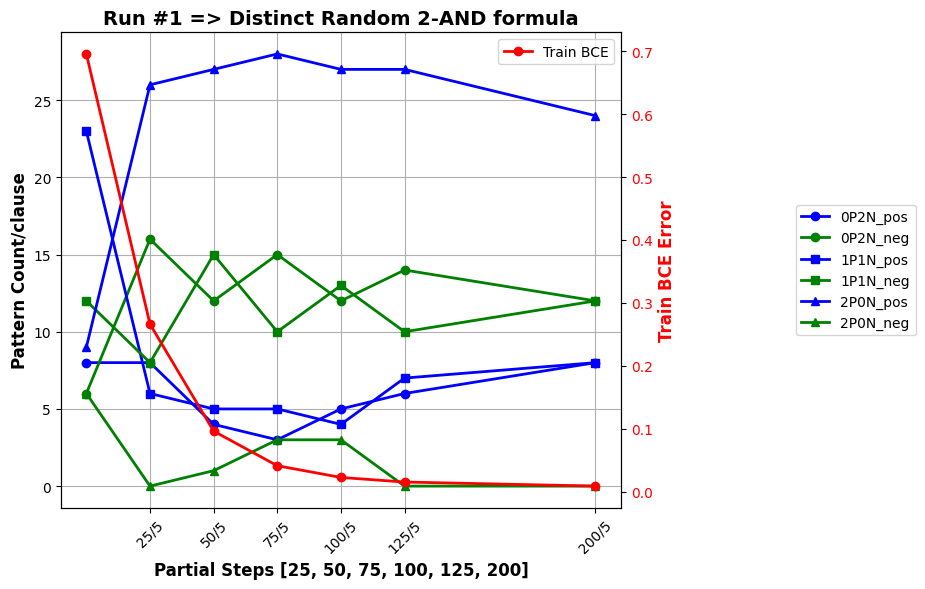

/home1/czhang/Neural-Computation/stats.py:351: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


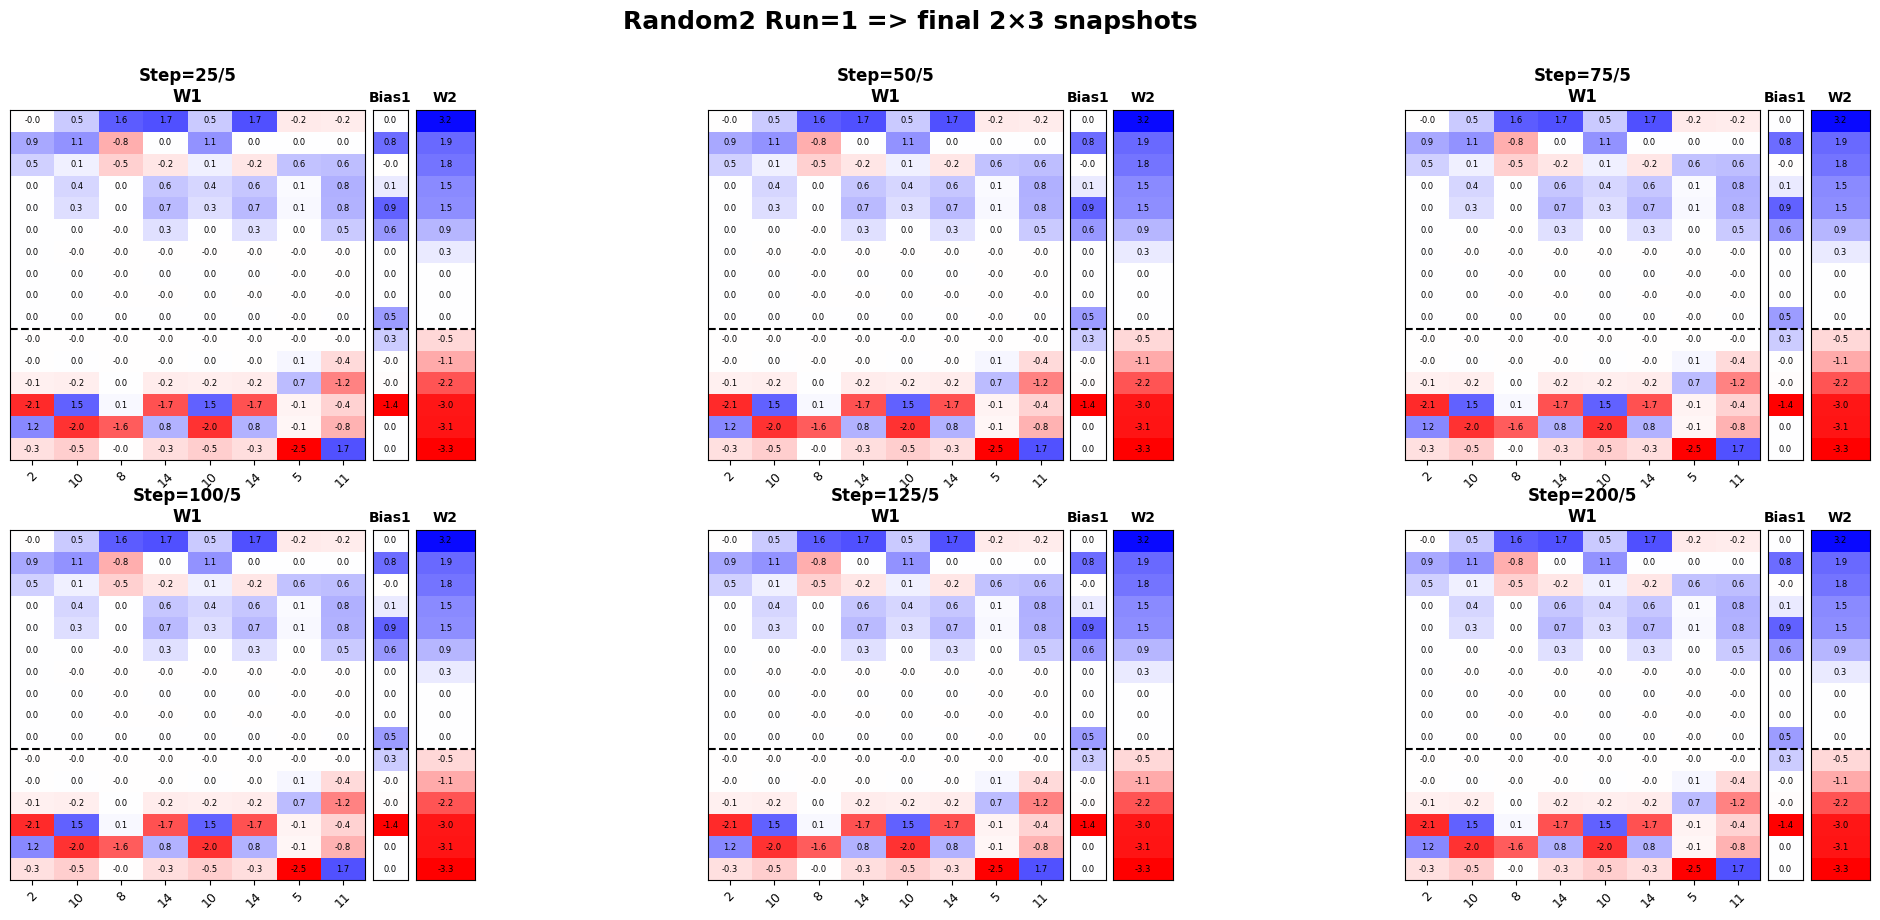

Saved => ./pdfs/Random2 Run=1_final_6snap_2x3.pdf


In [30]:
train.run_single_model(
    run_i=0,
    aggregator_steps=aggregator_steps,
    plot_steps=plot_steps,
    input_dim=16,
    hidden_dim=16,
    num_features_per_clause=2,
    train_loader=train_loader,
    test_loader=test_loader,
    run_name="testrun",
    base_dir=".",
    l2_reg_factor=0.0,
    l1_reg_factor=1e-3,
    seed_offset=0,
    cset=cset,
)

testrun: using new random 2-AND formula => [[(2, False), (10, False)], [(8, False), (14, False)], [(10, False), (14, False)], [(5, False), (11, False)]]
testrun: epoch=0/5, trainErr: 0.70, testErr: 0.52, 0P2N_pos: 8.00, 0P2N_neg: 6.00, 1P1N_pos: 23.00, 1P1N_neg: 12.00, 2P0N_pos: 9.00, 2P0N_neg: 6.00, total_kp_pos: 9.00, sum_of_clauseOverlaps_kp_pos: 4.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 6.00, sum_of_clauseOverlaps_kp_neg: 2.00, overlap_kp_neg_with_prior: 0.00


testrun: epoch=25/5, trainErr: 0.22, testErr: 0.04, 0P2N_pos: 3.00, 0P2N_neg: 11.00, 1P1N_pos: 5.00, 1P1N_neg: 17.00, 2P0N_pos: 28.00, 2P0N_neg: 0.00, total_kp_pos: 28.00, sum_of_clauseOverlaps_kp_pos: 33.00, overlap_kp_pos_with_prior: 9.00, total_kp_neg: 0.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
testrun: epoch=50/5, trainErr: 0.06, testErr: 0.00, 0P2N_pos: 5.00, 0P2N_neg: 14.00, 1P1N_pos: 6.00, 1P1N_neg: 14.00, 2P0N_pos: 25.00, 2P0N_neg: 0.00, total_kp_pos: 25.00, sum_of_clauseOverlaps_kp_pos: 26.00, overlap_kp_pos_with_prior: 25.00, total_kp_neg: 0.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
testrun: epoch=75/5, trainErr: 0.02, testErr: 0.00, 0P2N_pos: 5.00, 0P2N_neg: 11.00, 1P1N_pos: 6.00, 1P1N_neg: 17.00, 2P0N_pos: 25.00, 2P0N_neg: 0.00, total_kp_pos: 25.00, sum_of_clauseOverlaps_kp_pos: 26.00, overlap_kp_pos_with_prior: 25.00, total_kp_neg: 0.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
testrun:

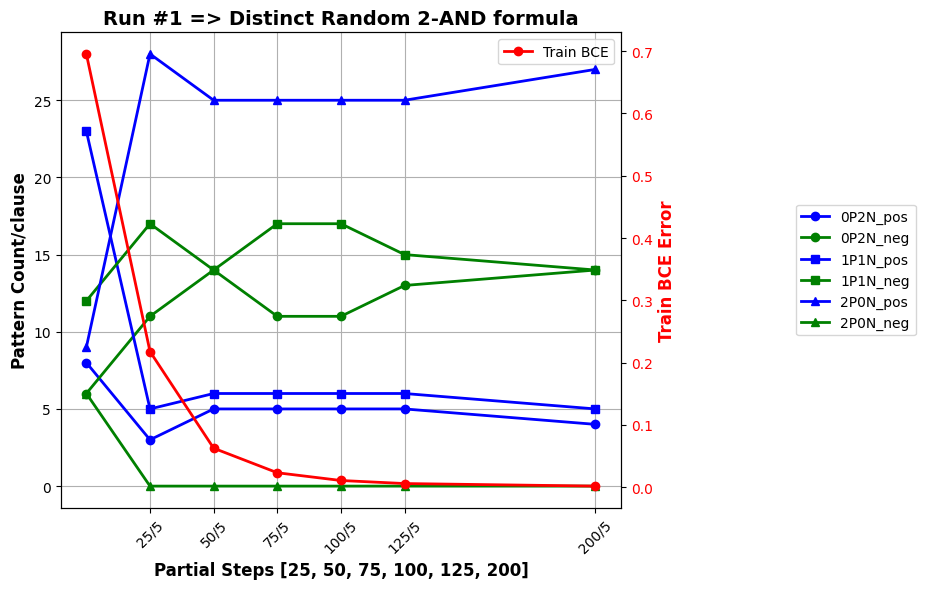

/home1/czhang/Neural-Computation/stats.py:351: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


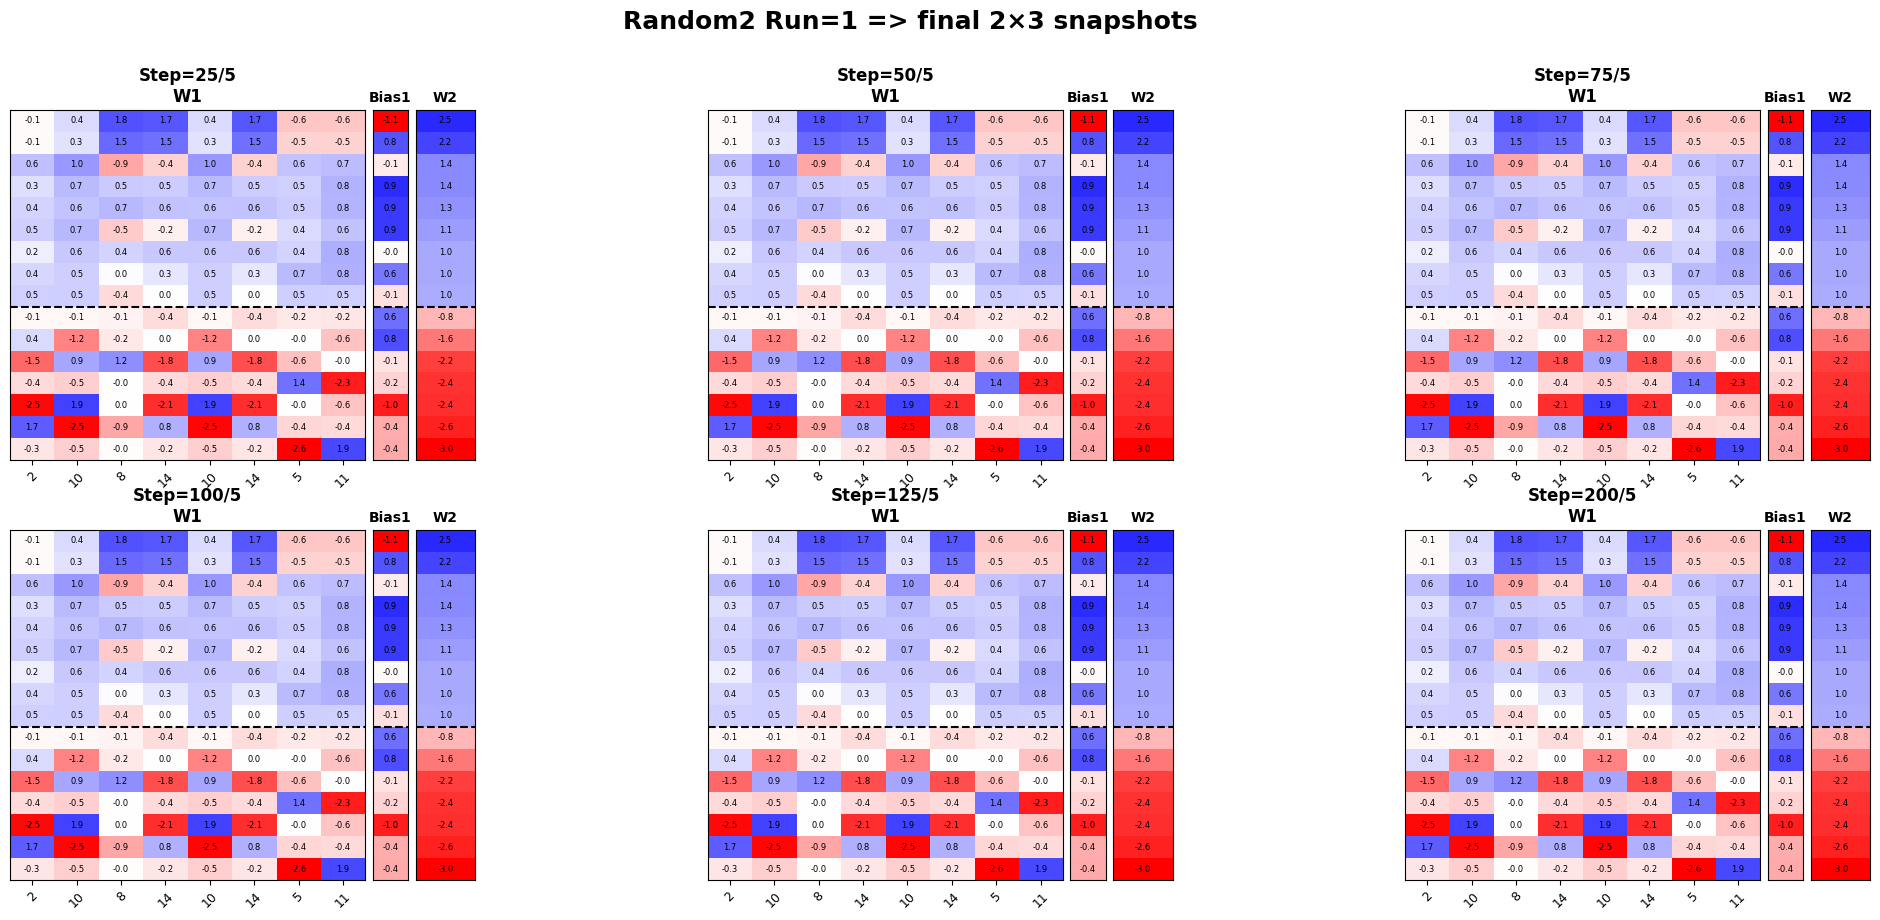

Saved => ./pdfs/Random2 Run=1_final_6snap_2x3.pdf


In [31]:
train.run_single_model(
    run_i=0,
    aggregator_steps=aggregator_steps,
    plot_steps=plot_steps,
    input_dim=16,
    hidden_dim=16,
    num_features_per_clause=2,
    train_loader=train_loader,
    test_loader=test_loader,
    run_name="testrun",
    base_dir=".",
    l2_reg_factor=0.0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=cset,
)

Replicate original

In [32]:
global_big_pool_4 = data.create_mixed_clause_pool_random_disjoint(
    global_input_dim=32,
    pool_size=256,
    features_per_and=4,
    seed=0,
)

In [33]:
cset = random.sample(global_big_pool_4, 4)

In [34]:
cset

[[(13, False), (20, False), (22, False), (27, False)],
 [(16, False), (19, False), (24, False), (30, False)],
 [(2, False), (13, False), (16, False), (25, False)],
 [(3, False), (15, False), (18, False), (21, False)]]

In [35]:
dset = data.generate_dataset(
    cset=cset,
    input_dim=32,
    train_size=10000,
    test_size=2000,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
)

In [36]:
train_loader, test_loader = dset

In [37]:
agg_steps = list(range(16)) + list(range(25, 100+1, 25))
assert len(agg_steps) == 20

plot_steps = [0, 3, 6, 10, 15, 100]

replicate: using new random 4-AND formula => [[(13, False), (20, False), (22, False), (27, False)], [(16, False), (19, False), (24, False), (30, False)], [(2, False), (13, False), (16, False), (25, False)], [(3, False), (15, False), (18, False), (21, False)]]
replicate: epoch=0/5, trainErr: 0.70, testErr: 0.49, 0P4N_pos: 6.00, 0P4N_neg: 1.00, 1P3N_pos: 13.00, 1P3N_neg: 10.00, 2P2N_pos: 37.00, 2P2N_neg: 22.00, 3P1N_pos: 21.00, 3P1N_neg: 14.00, 4P0N_pos: 3.00, 4P0N_neg: 1.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 1.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
replicate: epoch=0/5, trainErr: 0.70, testErr: 0.49, 0P4N_pos: 6.00, 0P4N_neg: 1.00, 1P3N_pos: 13.00, 1P3N_neg: 10.00, 2P2N_pos: 37.00, 2P2N_neg: 22.00, 3P1N_pos: 21.00, 3P1N_neg: 14.00, 4P0N_pos: 3.00, 4P0N_neg: 1.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 3.00, total_kp_neg: 1.00, sum_of_clauseOve

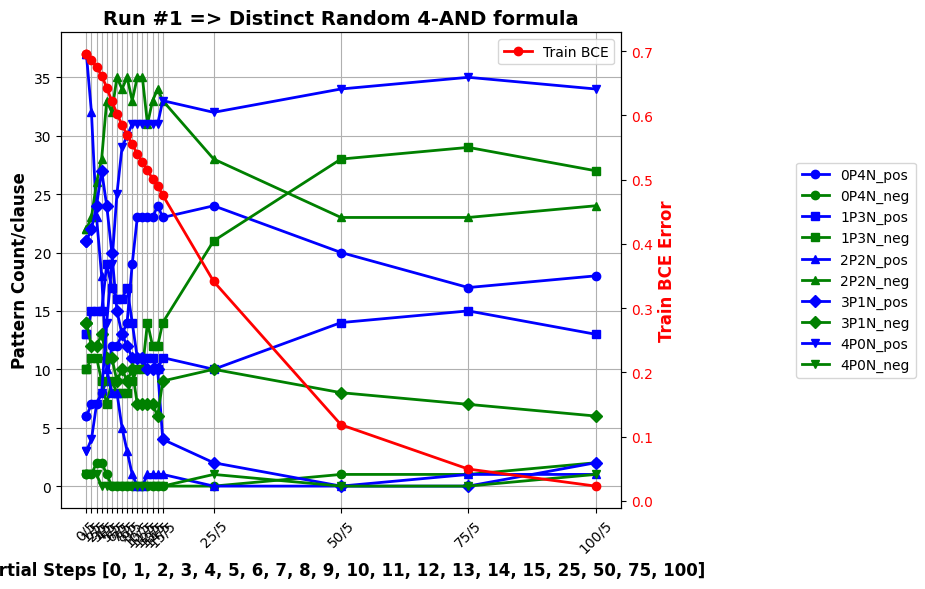

/home1/czhang/Neural-Computation/stats.py:351: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


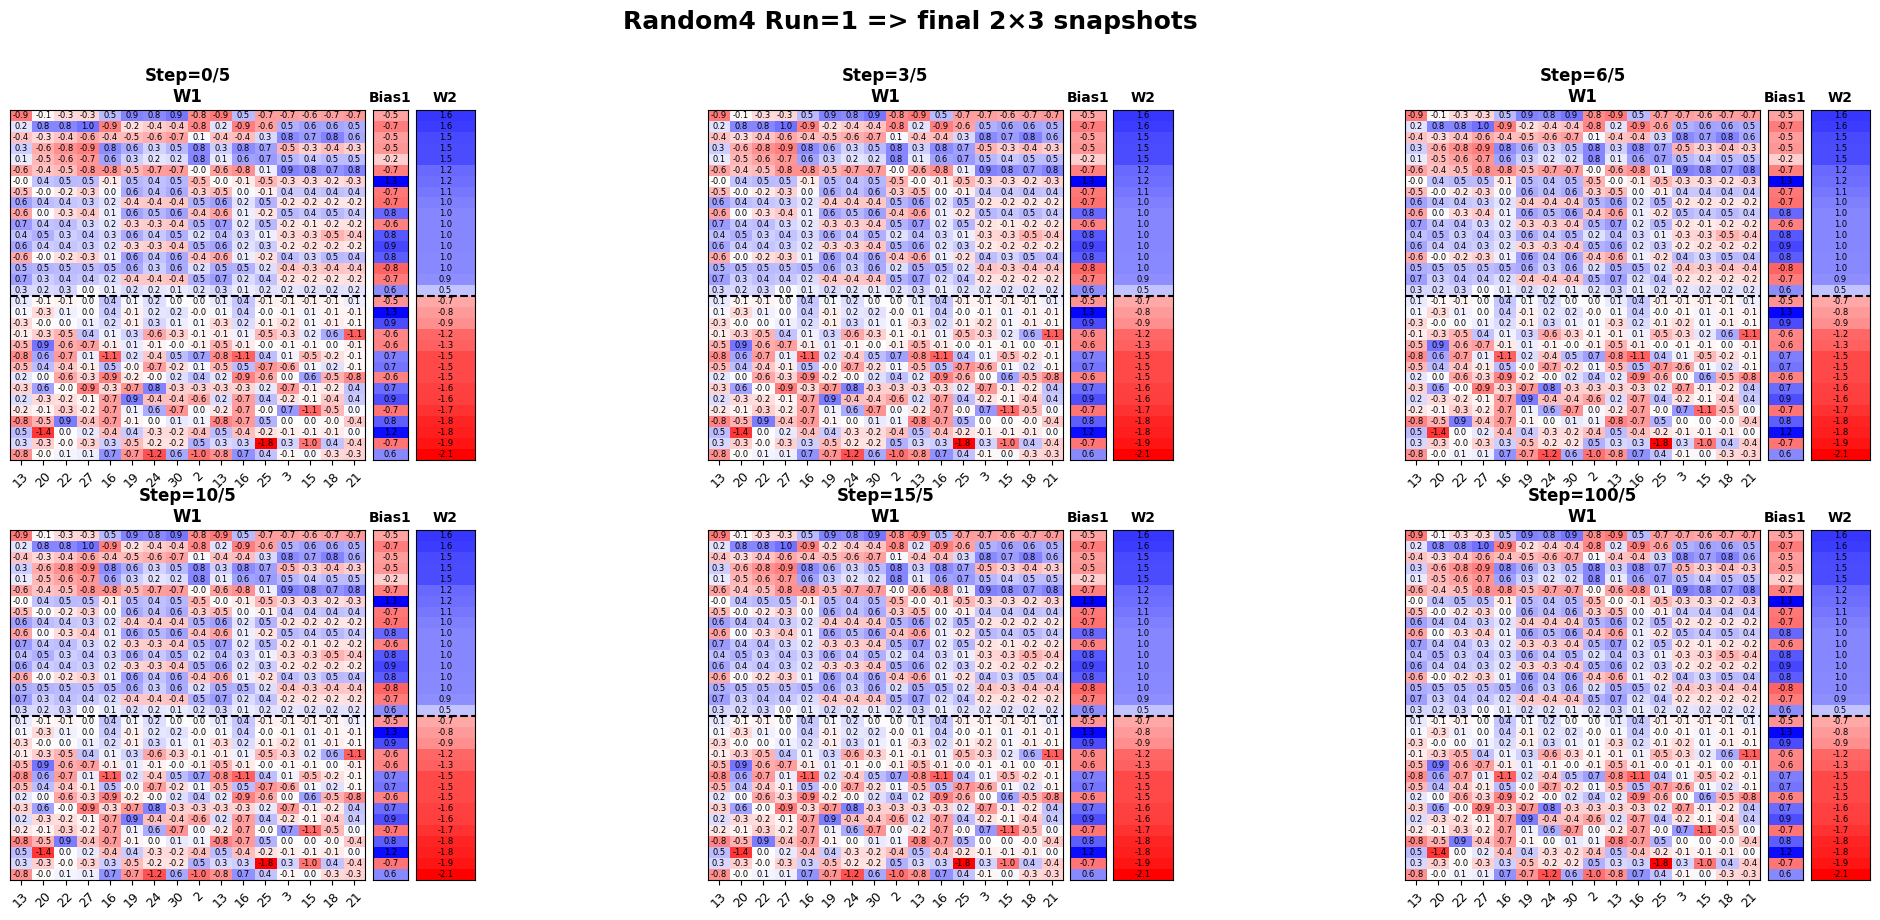

Saved => ./pdfs/Random4 Run=1_final_6snap_2x3.pdf


In [38]:
train.run_single_model(
    run_i=0,
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=32,
    hidden_dim=32,
    num_features_per_clause=4,
    train_loader=train_loader,
    test_loader=test_loader,
    run_name="replicate",
    base_dir=".",
    l2_reg_factor=1e-5,
    l1_reg_factor=0,
    seed_offset=0,
    cset=cset,
)